<a href="https://colab.research.google.com/github/Saramohamed188/recommendationsystem/blob/main/Copy_of_Rs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
trip_data = pd.read_csv('/content/Tripdata.csv')
user_favorites = pd.read_csv('/content/userdata.csv')

In [3]:
pd.read_csv("/content/Tripdata.csv")

,trip_id,Place,discription,companyname,price,tourismtype,days
0,7b6c5d4e3f2a1e0d,Red Sea,Dive deep into the Red Sea's underwater realm ...,Seaside Success Escapes,12700,Medical Travel,11
1,7c8b9a0f1e2d3c4b,Luxor,Explore Luxor's ancient treasures in style wit...,Seaside Success Escapes,4850,Cultural Tourism,6
2,c5b6a7d8f9e0c1e2d3,Cairo,Step back in time with a ride on Cairo's histo...,Seaside Success Escapes,3400,Cultural Tourism,4
3,2d1e3c4b5a6f7e8d9b0a,Cairo,Capture the vibrant essence of Cairo's streets...,Seaside Success Escapes,2300,Adventure Tourism,5
4,6b7c8d9e0f1a2c3d4e5,Cairo,Experience the Egyptian Museum in a new light ...,Seaside Success Escapes,2000,Cultural Tourism,4
...,...,...,...,...,...,...,...
194,1c2d3e4f5a6b7,Red Sea,Red Sea Marine Conservation Expedition: Join a...,Seabound Serenity Safari,17400,Adventure Tourism,15
195,0e1f2a3b4c5d6,Aswan,Aswan Nubian Dance Workshop: Learn traditional...,Coastal Commerce Cruise,6900,Cultural Tourism,8
196,9a0b1c2d3e4f5,Luxor,Luxor Nighttime Horse Carriage Ride: Take a ro...,Oceanfront Odyssey Trek,9300,Leisure Tourism,11
197,8c9d0e1f2a3b4,Cairo,Cairo Urban Farm Tour: Discover urban farming ...,Seashore Strategy Quest,4300,Leisure Tourism,7


In [4]:
pd.read_csv("/content/userdata.csv")


,User_id,trip_id
0,777,0a1b2c3d4e5f6a7b
1,5,0c1d2e3f4a5b6
2,333,0c1d2e3f4a5b6c7d
3,123,0d1c2b3a4f5e6d7c
4,11,0d1e2f3c4b5a6d7e8f9a
...,...,...
134,4,d5c4b3a2f1e0d9c8b
135,123,d5c4b3a2f1e0d9c8b
136,11,e3d2c1b0a9f8e7d6c5
137,22,e5c32a8f714d9b6c80fe1a2d


In [5]:
print(trip_data.columns)


Index(['trip_id', 'Place', 'discription', 'companyname', 'price',
       'tourismtype', 'days'],
      dtype='object')


In [6]:
trip_data.dropna(inplace=True)
user_favorites.dropna(inplace=True)

In [7]:
trip_data['Place'] = trip_data['Place'].str.replace(' ', '')


In [8]:
features = trip_data[['price', 'days', 'Place']]


In [9]:
encoder = LabelEncoder()
features['Place_encoded'] = encoder.fit_transform(features['Place'])
trip_data['Place_encoded'] = features['Place_encoded']

<ipython-input-9-1533f853f426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Place_encoded'] = encoder.fit_transform(features['Place'])


In [10]:
print(features.columns)

Index(['price', 'days', 'Place', 'Place_encoded'], dtype='object')


In [11]:
features.drop(columns=['Place'], inplace=True)


<ipython-input-11-3df59dc81a1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(columns=['Place'], inplace=True)


In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

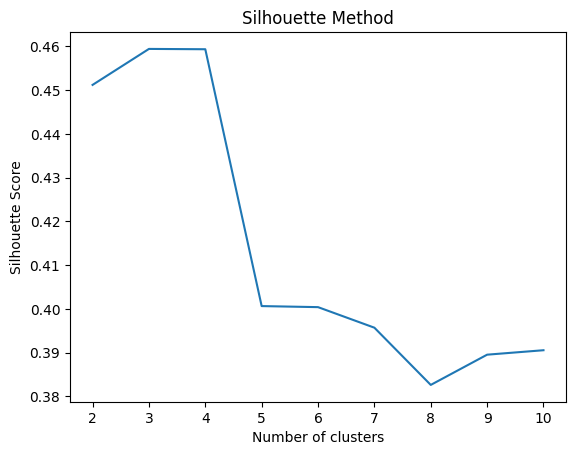

In [13]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [14]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
trip_data['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
def recommend_trips(user_id, num_recommendations=10):
    user_likes = user_favorites[user_favorites['User_id'] == user_id]['trip_id']
    user_preferences = trip_data[trip_data['trip_id'].isin(user_likes)][['price', 'days', 'Place_encoded']]
    user_cluster = kmeans.predict(scaler.transform(user_preferences))
    similar_trips = trip_data[trip_data['cluster'].isin(user_cluster)]

    recommended_trips = similar_trips[~similar_trips['trip_id'].isin(user_likes)]

    if len(recommended_trips) > num_recommendations:
        recommended_trips = recommended_trips.sample(n=num_recommendations, random_state=42)

    return recommended_trips


In [16]:
User_id = 777
recommended_trips_for_user_777 = recommend_trips(User_id)
print("Recommended trips for User 777:")
print(recommended_trips_for_user_777[['trip_id','price','Place']])

Recommended trips for User 777:
                      trip_id  price           Place
89     8a9b0c1d2e3f4b5c6d7e8f   1050           Dahab
144             1a2b3c4d5e6f7   4300           Aswan
7            5a4b3c2d1e0f9e8d   4550           Cairo
73   7af69a23dc872b8ef22d51d3   1000           Cairo
41        3b4c5a6d7f8e9b0c1e2    500          RedSea
197             8c9d0e1f2a3b4   4300           Cairo
109           6e7f8a9b0c1d2e3   1800          RedSea
16         9a8b7c6d5e4f3a2b1c   1550           Cairo
145             0c1d2e3f4a5b6   6700  St.Catherine's
116           9a0b1c2d3e4f5a6   3450           Cairo
